## Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: It's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [93]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Import metrics individually this time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
accuracy_score, roc_curve,  RocCurveDisplay, roc_auc_score, recall_score, \
precision_score, f1_score, classification_report


In [5]:
df = pd.read_csv('chronic_kidney_disease_full.csv')

In [6]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

__Answer:__ htn, dm, and cad

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [11]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

In [13]:
df.dropna()
# Only 158 rows remains in the dataframe.
# Dropping every row that contained at least one missing value is lossing more than 60.5 percent of information. 
# Moreover, it might affect the acccuracy of model.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

__Answer:__ 
1. If we look at the top three missing value which are rbc, wbcc and rbcc, they are all about the blood. It can be assumed that there might be mistake in this process or testing these three value are not required in some cases.
2. Inconsistant practice from different staffs. 
3. Imprecise data resulting from external factor. For example, the blood pressure that can be high if patient sit in bad posture or have just walked fast.

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has chronic kidney disease (CKD) will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

__Answer:__ The simpliest way is to tell everyone that they have chronic kidney disease (CKD).

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

__Answer:__ 
- Optimize : Recall
- Minimize : False  Negative

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

__Answer:__ Telling everyone that they have CKD can leads to panicking and distress.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

__Answer:__ The simpliest way is to tell everyone that they don't have chronic kidney disease (CKD).

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

__Answer:__ 
- Optimize : spcificity
- Minimize : False Positive

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

__Answer:__ Delaying medical care can exacerbate chronic kidney disease, resulting in heightened cardiovascular issues, anemia, bone complications, malnutrition, and a diminished quality of life.

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [41]:
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['dm'] = df['dm'].map({'yes': 1, 'no': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})

In [43]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [81]:
columns = ['age','sg','al','hemo','rbcc','htn','dm','cad','pe','ane']
# Fill missing values with the median of each column
for col in columns:
    df[col] = df[col].fillna(df[col].mean())

In [125]:
X = df[['age','sg','al','hemo','rbcc','htn','dm','cad','pe','ane']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, stratify=y, random_state=42)

In [127]:
# Scale Features
sc = StandardScaler()
# Fit/transform
X_train_sc = sc.fit_transform(X_train)
# Transform
X_test_sc = sc.transform(X_test)

In [129]:
logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)

LogisticRegression()

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [156]:
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logreg.coef_[0]})
print(coef_df)

  Feature  Coefficient
0     age     0.121896
1      sg    -1.492051
2      al     0.579021
3    hemo    -1.115725
4    rbcc    -0.962116
5     htn     1.053413
6      dm     0.757026
7     cad     0.057513
8      pe     0.416988
9     ane     0.110867


__Answer:__ Age has positive coefficient of 0.121896 means that holding other features constant If age increases by 1 unit, the log-odds of the having ckd will increase by 0.121896.

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

__Answer:__ Cad has positive coefficient of 0.057513 means that holding other features constant if that person has cad, the log-odds of the having ckd will increase by 0.057513.

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

__Answer:__ It excels in binary and multiclass classification tasks. Its flexibility allows it to work with both categorical and numerical data. The model's coefficients offer insights into how different features influence the outcome.

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why?

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

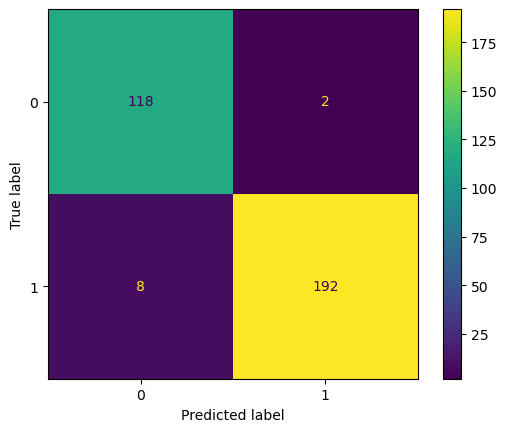

In [138]:
# Generate predictions
y_preds = logreg.predict(X_test_sc)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_preds)
# Plot it!
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_).plot();

In [140]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       120
           1       0.99      0.96      0.97       200

    accuracy                           0.97       320
   macro avg       0.96      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



__Answer:__ Confusion matrix show the performance of our model.

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

__Answer:__ We want to optimize sensitivity of the model indicates that the model correctly identifies most of the positive results.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: Imagine when you were in the classroom and voted about something, at the time that majority of people raised their hands, the rest of class which are minority frequently raised thier hand according to follow the majority. The unbalanced classes in this case is the same thing, the minority which is people with no CKD might ne predicted to have CKD to follow the majority.


### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: In an unbalanced dataset, where one class greatly outnumbers another, standard performance metrics like accuracy can be misleading. A model that always predicts the majority class could have high accuracy but would fail to identify cases in the minority class, which could lead to missed diagnoses.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [168]:
# a random sample of size 200,000 of individuals who have CKD with replacement. 
ckd_sample = df[df['class'] == 1].sample(n = 200000, replace = True, random_state = 42)
# Concat with original data
unbalanced_df = pd.concat([df, ckd_sample])
print(unbalanced_df['class'].value_counts())

class
1    200250
0       150
Name: count, dtype: int64


### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [184]:
X_unbalanced = unbalanced_df[['age','sg','al','hemo','rbcc','htn','dm','cad','pe','ane']]
y_unbalanced = unbalanced_df['class']

X_train, X_test, y_train, y_test = train_test_split(X_unbalanced, y_unbalanced, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9994278110445776
0.9991616766467066


In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25        49
           1       1.00      1.00      1.00     50051

    accuracy                           1.00     50100
   macro avg       1.00      0.57      0.62     50100
weighted avg       1.00      1.00      1.00     50100



__Answer:__ It can be seen that almost all of patients are predicted to be in positive class (have CKD)

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!

__Answer:__ The model using Logistic Regression performs well with 0.97 of accuracy. However, to improve this model others features can be added and the data collecting practice should be standardized for less null data.